[Series](#srs)

[Dataframes](#dff)

[Accessing and changing values of a dataframe](#acdf)

[Datafiles and Binning](#dab)

[Multilevel indexing](#mlm)

[Data viz using pandas](#vizdp)

[Datetime](#dta)

<a id="srs"></a>

### Series

In [1]:
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [2]:
print(S.index)
print(S.values)

RangeIndex(start=0, stop=6, step=1)
[11 28 72  3  5  8]


In [3]:
# If we compare this to creating an array in numpy, we will find lots of similarities:

import numpy as np
X = np.array([11, 28, 72, 3, 5, 8])
print(X)
print(S.values)
# both are the same type:
print(type(S.values), type(X))

[11 28 72  3  5  8]
[11 28 72  3  5  8]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
# index addition

#The indices do not have to be the same for the Series addition. The index will be the "union" of both indices. If an index doesn't occur in both Series, the value for this Series will be NaN:

fruits = ['peaches', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']

S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits2)
print(S + S2)

cherries       83.0
oranges        46.0
peaches         NaN
pears          42.0
raspberries     NaN
dtype: float64


In [5]:
# indexing 

print(S[['apples', 'oranges', 'cherries']])

apples       NaN
oranges     33.0
cherries    52.0
dtype: float64


/home/akash/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [9]:
print(S['peaches'])

20


In [ ]:
# Similar to numpy arrays, we can filter Pandas Series with a Boolean array:

S[S>30]

In [10]:
# Creating Series Objects from Dictionaries
# We can even use a dictionary to create a Series object. The resulting Series contains the dict's keys as the indices and the values as the values.

cities = {"London":    8615246, 
          "Berlin":    3562166, 
          "Madrid":    3165235, 
          "Rome":      2874038, 
          "Paris":     2273305, 
          "Vienna":    1805681, 
          "Bucharest": 1803425, 
          "Hamburg":   1760433,
          "Budapest":  1754000,
          "Warsaw":    1740119,
          "Barcelona": 1602386,
          "Munich":    1493900,
          "Milan":     1350680}

city_series = pd.Series(cities)
print(city_series)

London       8615246
Berlin       3562166
Madrid       3165235
Rome         2874038
Paris        2273305
Vienna       1805681
Bucharest    1803425
Hamburg      1760433
Budapest     1754000
Warsaw       1740119
Barcelona    1602386
Munich       1493900
Milan        1350680
dtype: int64


In [11]:
## missing data

# We can check for missing values with the methods isnull and notnull:

my_cities = ["London", "Paris", "Zurich", "Berlin", 
             "Stuttgart", "Hamburg"]

my_city_series = pd.Series(cities, 
                           index=my_cities)
print(my_city_series.isnull())

London       False
Paris        False
Zurich        True
Berlin       False
Stuttgart     True
Hamburg      False
dtype: bool


In [12]:
print(my_city_series.notnull())

London        True
Paris         True
Zurich       False
Berlin        True
Stuttgart    False
Hamburg       True
dtype: bool


In [13]:
# Connection between NaN and None
# We get also a NaN, if a value in the dictionary has a None:

d = {"a":23, "b":45, "c":None, "d":0}
S = pd.Series(d)
print(S)

a    23.0
b    45.0
c     NaN
d     0.0
dtype: float64


In [14]:
# Filtering out Missing Data

# It's possible to filter out missing data with the Series method dropna. It returns a Series which consists only of non-null data:

print(my_city_series.dropna())

London     8615246.0
Paris      2273305.0
Berlin     3562166.0
Hamburg    1760433.0
dtype: float64


In [15]:
# Filling in Missing Data
# In many cases you don't want to filter out missing data, but you want to fill in appropriate data for the empty gaps. A suitable method in many situations will be fillna:

print(my_city_series.fillna(0))


London       8615246.0
Paris        2273305.0
Zurich             0.0
Berlin       3562166.0
Stuttgart          0.0
Hamburg      1760433.0
dtype: float64


<a id="dff"></a>
    
## Dataframes

In [17]:
import pandas as pd

years = range(2014, 2018)

shop1 = pd.Series([2409.14, 2941.01, 3496.83, 3119.55], index=years)
shop2 = pd.Series([1203.45, 3441.62, 3007.83, 3619.53], index=years)
shop3 = pd.Series([3412.12, 3491.16, 3457.19, 1963.10], index=years)

#What happens, if we concatenate these "shop" Series? Pandas provides a concat function for this purpose:

pd.concat([shop1, shop2, shop3])

2014    2409.14
2015    2941.01
2016    3496.83
2017    3119.55
2014    1203.45
2015    3441.62
2016    3007.83
2017    3619.53
2014    3412.12
2015    3491.16
2016    3457.19
2017    1963.10
dtype: float64

In [18]:
# This result is not what we have intended or expected. The reason is that concat used 0 as the default for the axis parameter. Let's do it with "axis=1":

shops_df = pd.concat([shop1, shop2, shop3], axis=1)
shops_df

,0,1,2
2014,2409.14,1203.45,3412.12
2015,2941.01,3441.62,3491.16
2016,3496.83,3007.83,3457.19
2017,3119.55,3619.53,1963.10


In [19]:
# Let's do some fine sanding by giving names to the columns:

cities = ["Zürich", "Winterthur", "Freiburg"]
shops_df.columns = cities 
print(shops_df)

# alternative way: give names to series:
shop1.name = "Zürich"
shop2.name = "Winterthur"
shop3.name = "Freiburg"

print("------")
shops_df2 = pd.concat([shop1, shop2, shop3], axis=1)
print(shops_df2)

       Zürich  Winterthur  Freiburg
2014  2409.14     1203.45   3412.12
2015  2941.01     3441.62   3491.16
2016  3496.83     3007.83   3457.19
2017  3119.55     3619.53   1963.10
------
       Zürich  Winterthur  Freiburg
2014  2409.14     1203.45   3412.12
2015  2941.01     3441.62   3491.16
2016  3496.83     3007.83   3457.19
2017  3119.55     3619.53   1963.10


In [20]:
# DataFrames from Dictionaries
# A DataFrame has a row and column index; it's like a dict of Series with a common index.

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}

city_frame = pd.DataFrame(cities)
city_frame

,name,population,country
0,London,8615246,England
1,Berlin,3562166,Germany
2,Madrid,3165235,Spain
3,Rome,2874038,Italy
4,Paris,2273305,France
5,Vienna,1805681,Austria
6,Bucharest,1803425,Romania
7,Hamburg,1760433,Germany
8,Budapest,1754000,Hungary
9,Warsaw,1740119,Poland


In [21]:
# custom index

# We can see that an index (0,1,2, ...) has been automatically assigned to the DataFrame. We can also assign a custom index to the DataFrame object:

ordinals = ["first", "second", "third", "fourth",
            "fifth", "sixth", "seventh", "eigth",
            "ninth", "tenth", "eleventh", "twelvth",
            "thirteenth"]
city_frame = pd.DataFrame(cities, index=ordinals)
city_frame

,name,population,country
first,London,8615246,England
second,Berlin,3562166,Germany
third,Madrid,3165235,Spain
fourth,Rome,2874038,Italy
fifth,Paris,2273305,France
sixth,Vienna,1805681,Austria
seventh,Bucharest,1803425,Romania
eigth,Hamburg,1760433,Germany
ninth,Budapest,1754000,Hungary
tenth,Warsaw,1740119,Poland


In [22]:
# Rearranging the Order of Columns
# We can also define and rearrange the order of the columns at the time of creation of the DataFrame. This makes also sure that we will have a defined ordering of our columns, if we create the DataFrame from a dictionary. Dictionaries are not ordered, as you have seen in our chapter on Dictionaries in our Python tutorial, so we cannot know in advance what the ordering of our columns will be:

city_frame = pd.DataFrame(cities,
                          columns=["name", 
                                   "country", 
                                   "population"])
city_frame

,name,country,population
0,London,England,8615246
1,Berlin,Germany,3562166
2,Madrid,Spain,3165235
3,Rome,Italy,2874038
4,Paris,France,2273305
5,Vienna,Austria,1805681
6,Bucharest,Romania,1803425
7,Hamburg,Germany,1760433
8,Budapest,Hungary,1754000
9,Warsaw,Poland,1740119


In [23]:
city_frame.rename(columns={"name":"Soyadı", 
                           "country":"Ülke", 
                           "population":"Nüfus"},
                 inplace=True)
city_frame

,Soyadı,Ülke,Nüfus
0,London,England,8615246
1,Berlin,Germany,3562166
2,Madrid,Spain,3165235
3,Rome,Italy,2874038
4,Paris,France,2273305
5,Vienna,Austria,1805681
6,Bucharest,Romania,1803425
7,Hamburg,Germany,1760433
8,Budapest,Hungary,1754000
9,Warsaw,Poland,1740119


In [25]:
# Label-Indexing on the Rows
# So far we have indexed DataFrames via the columns. We will demonstrate now, how we can access rows from DataFrames via the locators 'loc' and 'iloc'. ('ix' is deprecated and will be removed in the future)

city_frame = pd.DataFrame(cities, 
                          columns=("name", "population"), 
                          index=cities["country"])
print(city_frame.loc["Germany"])

            name  population
Germany   Berlin     3562166
Germany  Hamburg     1760433
Germany   Munich     1493900


In [26]:
# Existing Column as the Index of a DataFrame
# We want to create a more useful index in the following example. We will use the country name as the index, i.e. the list value associated to the key "country" of our cities dictionary:

city_frame = pd.DataFrame(cities,
                          columns=["name", "population"],
                          index=cities["country"])

city_frame

,name,population
England,London,8615246
Germany,Berlin,3562166
Spain,Madrid,3165235
Italy,Rome,2874038
France,Paris,2273305
Austria,Vienna,1805681
Romania,Bucharest,1803425
Germany,Hamburg,1760433
Hungary,Budapest,1754000
Poland,Warsaw,1740119


In [27]:
# Sum and Cumulative Sum
# We can calculate the sum of all the columns of a DataFrame or the sum of certain columns:

print(city_frame.sum())

# We can use "cumsum" to calculate the cumulative sum:

x = city_frame["population"].cumsum()
print(x)

name          LondonBerlinMadridRomeParisViennaBucharestHamb...
population                                             33800614
dtype: object
England     8615246
Germany    12177412
Spain      15342647
Italy      18216685
France     20489990
Austria    22295671
Romania    24099096
Germany    25859529
Hungary    27613529
Poland     29353648
Spain      30956034
Germany    32449934
Italy      33800614
Name: population, dtype: int64


In [28]:
# Assigning New Values to Columns
# x is a Pandas Series. We can reassign the previously calculated cumulative sums to the population column:

city_frame["population"] = x
print(city_frame)

              name  population
England     London     8615246
Germany     Berlin    12177412
Spain       Madrid    15342647
Italy         Rome    18216685
France       Paris    20489990
Austria     Vienna    22295671
Romania  Bucharest    24099096
Germany    Hamburg    25859529
Hungary   Budapest    27613529
Poland      Warsaw    29353648
Spain    Barcelona    30956034
Germany     Munich    32449934
Italy        Milan    33800614


In [29]:
# Assigning New Values to a Column
# The column area is still not defined. We can set all elements of the column to the same value:

city_frame["area"] = 1572
print(city_frame)

              name  population  area
England     London     8615246  1572
Germany     Berlin    12177412  1572
Spain       Madrid    15342647  1572
Italy         Rome    18216685  1572
France       Paris    20489990  1572
Austria     Vienna    22295671  1572
Romania  Bucharest    24099096  1572
Germany    Hamburg    25859529  1572
Hungary   Budapest    27613529  1572
Poland      Warsaw    29353648  1572
Spain    Barcelona    30956034  1572
Germany     Munich    32449934  1572
Italy        Milan    33800614  1572


In [30]:
# Sorting DataFrames

# Let's sort our DataFrame according to the city area:

city_frame = city_frame.sort_values(by="area", ascending=False)
print(city_frame)

              name  population  area
England     London     8615246  1572
Germany     Berlin    12177412  1572
Spain       Madrid    15342647  1572
Italy         Rome    18216685  1572
France       Paris    20489990  1572
Austria     Vienna    22295671  1572
Romania  Bucharest    24099096  1572
Germany    Hamburg    25859529  1572
Hungary   Budapest    27613529  1572
Poland      Warsaw    29353648  1572
Spain    Barcelona    30956034  1572
Germany     Munich    32449934  1572
Italy        Milan    33800614  1572


In [35]:
## inserting new column to existing 

city_frame = pd.DataFrame(cities,
                          columns=["country", 
                                   "area",
                                   "population"],
                          index=cities["name"])

some_areas = pd.Series([1572, 755, 181.8], 
                    index=['London', 'Hamburg', 'Milan'])

city_frame['area'] = some_areas

print(city_frame)

           country    area  population
London     England  1572.0     8615246
Berlin     Germany     NaN     3562166
Madrid       Spain     NaN     3165235
Rome         Italy     NaN     2874038
Paris       France     NaN     2273305
Vienna     Austria     NaN     1805681
Bucharest  Romania     NaN     1803425
Hamburg    Germany   755.0     1760433
Budapest   Hungary     NaN     1754000
Warsaw      Poland     NaN     1740119
Barcelona    Spain     NaN     1602386
Munich     Germany     NaN     1493900
Milan        Italy   181.8     1350680


In [36]:
# DataFrame from Nested Dictionaries
# A nested dictionary of dicts can be passed to a DataFrame as well. The indices of the outer dictionary are taken as the the columns and the inner keys. i.e. the keys of the nested dictionaries, are used as the row indices:

growth = {"Switzerland": {"2010": 3.0, "2011": 1.8, "2012": 1.1, "2013": 1.9},
          "Germany": {"2010": 4.1, "2011": 3.6, "2012":	0.4, "2013": 0.1},
          "France": {"2010":2.0,  "2011":2.1, "2012": 0.3, "2013": 0.3},
          "Greece": {"2010":-5.4, "2011":-8.9, "2012":-6.6, "2013":	-3.3},
          "Italy": {"2010":1.7, "2011":	0.6, "2012":-2.3, "2013":-1.9}
          } 
growth_frame = pd.DataFrame(growth)
growth_frame

,Switzerland,Germany,France,Greece,Italy
2010,3.0,4.1,2.0,-5.4,1.7
2011,1.8,3.6,2.1,-8.9,0.6
2012,1.1,0.4,0.3,-6.6,-2.3
2013,1.9,0.1,0.3,-3.3,-1.9


In [ ]:
# Inserting new columns into existing DataFrames

#In the previous example we have added the column area at creation time. Quite often it will be necessary to add or insert columns into existing DataFrames. For this purpose the DataFrame class provides a method "insert", which allows us to insert a column into a DataFrame at a specified location:

city_frame = pd.DataFrame(cities,
                          columns=["country", 
                                   "population"],
                          index=cities["name"])


idx = 1
city_frame.insert(loc=idx, column='area', value=area)

In [37]:
# Filling a DataFrame with random values:

import numpy as np

names = ['Frank', 'Eve', 'Stella', 'Guido', 'Lara']
index = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]
df = pd.DataFrame((np.random.randn(12, 5)*1000).round(2),
                  columns=names,
                  index=index)
df

,Frank,Eve,Stella,Guido,Lara
January,1457.08,-34.86,-319.07,1324.91,-647.70
February,773.62,435.64,800.59,645.62,-1208.51
March,-917.54,531.45,-740.43,-268.04,574.21
April,-1810.72,-1568.59,-826.43,1315.90,228.90
May,-187.84,513.89,1410.20,8.42,70.96
June,804.46,-415.58,1944.98,398.85,292.95
July,-1323.32,966.81,-118.53,-1273.33,576.84
August,-266.46,-249.81,-1250.41,-589.01,-1078.28
September,619.90,1293.75,-785.88,1034.85,-1468.44
October,-973.98,-1074.52,727.02,655.10,-1007.79


<a id="acdf"></a>

### accessing and changing values of a dataframe

In [ ]:
import pandas as pd

first = ('Mike', 'Dorothee', 'Tom', 'Bill', 'Pete', 'Kate')
last = ('Meyer', 'Maier', 'Meyer', 'Mayer', 'Meyr', 'Mair')
job = ('data analyst', 'programmer', 'computer scientist', 
       'data scientist', 'accountant', 'psychiatrist')
language = ('Python', 'Perl', 'Java', 'Java', 'Cobol', 'Brainfuck')

df = pd.DataFrame(list(zip(last, job, language)), 
                  columns =['last', 'job', 'language'],
                  index=first) 
df

In [ ]:
# Changing one value in DataFrame
# Pandas provides two ways, i.e. loc and at, to access or change a single value of a DataFrame. We will experiment with the height of Bill in the following Python code:

# accessing the job of Bill:
print(df.loc['Bill', 'job'])
# alternative way to access it with at:
print(df.at['Bill', 'job'])

# setting the job of Bill to 'data analyst' with 'loc'
df.loc['Bill', 'job'] = 'data analyst'
# let us check it:
print(df.loc['Bill', 'job'])

# setting the job of Bill to 'computer scientist' with 'at'
df.at['Pete', 'language'] = 'Python'

In [ ]:
# replace

s = pd.Series([27, 33, 13, 19])
s.replace(13, 42)

In [ ]:
df.replace("programmer", 
           "computer scientist", 
           inplace=True)
df

In [ ]:
df.replace(to_replace=['Mike', 'Tom', 'Perl'],
           value= ['Michael', 'Thomas', 'Python'], 
           inplace=True)
df

In [ ]:
# to_replace can be a dict
#Dictionaries can be used to specify different replacement values for different existing values. For example, {'a': 'b', 'y': 'z'} replaces the value 'a' with 'b' and 'y' with 'z'. To use a dict in this way the value parameter should be None.

#Ìf replace is applied on a DataFrame, a dict can specify that different values should be replaced in different columns. For example, {'a': 1, 'b': 'z'} looks for the value 1 in column 'a' and the value 'z' in column 'b' and replaces these values with whatever is specified in value. The value parameter should not be None in this case. You can treat this as a special case of passing two lists except that you are specifying the column to search in.
#If we use nested dictionaries like {'A': {'foo': 'bar'}}, they are interpreted like this: look in column 'A' for the value 'foo' and replace it with 'bar'. The value parameter has to be None in this case.

df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': ['foo', 'bar', 'bloo', 'blee', 'bloo'],
                   'C': ['green', 'red', 'blue', 'yellow', 'green']})

df.replace(to_replace={"A": {0: 42, 3: 33}, 'B': {'bloo': 'vloo'}},
           inplace=True)
df

In [39]:
# The method parameter of replace:
# When the parameter value is None and the parameter to_replace is a scalar, list or tuple, the method replace will use the parameter method to decide which replacement to perform. The possible values for method are pad, ffill, bfill, None. The default value is pad.
#First of all, you have to know that pad and ffill are equivalent.
#We will explain the way of working with the following Python example code. We will replace the values NN and LN of the following DataFrame in different ways by using the parameter method.

import pandas as pd

df = pd.DataFrame({
    'name':['Ben', 'Kate', 'Agnes', 'Ashleigh', 'Tom'],
    'job':['programmer', 'NN', 'NN', 'engineer', 'teacher'],
    'language':['Java', 'Python', 'LN', 'LN', 'C']})

In [ ]:
# method is backfill
df.replace(to_replace='NN', 
           value=None, 
           method='ffill')

df.replace(to_replace=['NN', 'LN'],
           value=None,
           method='ffill')

In [ ]:
#Conditional that returns a boolean Series

df.loc[df['shield'] > 6]


#Conditional that returns a boolean Series with column labels specified

df.loc[df['shield'] > 6, ['max_speed']]

#Callable that returns a boolean Series

df.loc[lambda df: df['shield'] == 8]

# Set value for rows matching callable condition

df.loc[df['shield'] > 35] = 0
df

In [ ]:
## Selecting, Boolean indexing and setting

# by position

df.iloc, df.iat

# by label

df.loc, df.at

## label/position

df.ix

In [ ]:
# Retrieving Series/DataFrame Information

>>> df.shape (rows,columns)
>>> df.index Describe index
>>> df.columns Describe DataFrame columns
>>> df.info() Info on DataFrame
>>> df.count() Number of non-NA values

# Summary
>>> df.sum() Sum of values
>>> df.cumsum() Cummulative sum of values
>>> df.min()/df.max() Minimum/maximum values
>>> df.idxmin()/df.idxmax() Minimum/Maximum index value
>>> df.describe() Summary statistics
>>> df.mean() Mean of values
>>> df.median() Median of values

# Applying Functions

>>> f = lambda x: x*2
>>> df.apply(f)# Apply function
>>> df.applymap(f) # apply function element wise

<a id="dab"></a>

### Data files and binning

In [ ]:
import pandas as pd

exchange_rates = pd.read_csv("data1/dollar_euro.txt",
                             sep="\t")
print(exchange_rates)

In [ ]:
# As we can see, read_csv used automatically the first line as the names for the columns. It is possible to give other names to the columns. For this purpose, we have to skip the first line by setting the parameter "header" to 0 and we have to assign a list with the column names to the parameter "names":
    
import pandas as pd

exchange_rates = pd.read_csv("data1/dollar_euro.txt",
                             sep="\t",
                             header=0,
                             names=["year", "min", "max", "days"])
print(exchange_rates)

In [ ]:
excel_file = pd.ExcelFile("data1/sales.xls")

sheet = pd.read_excel(excel_file)
sheet

In [42]:
# Binning in Python
# The following Python function can be used to create bins.

def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

# We will create now five bins (quantity=5) with a width of 10 (width=10) starting from 10 (lower_bound=10):

bins = create_bins(lower_bound=10,
                   width=10,
                   quantity=5)


from collections import Counter

bins = create_bins(lower_bound=50,
                   width=4,
                   quantity=10)

print(bins)

[(50, 54), (54, 58), (58, 62), (62, 66), (66, 70), (70, 74), (74, 78), (78, 82), (82, 86), (86, 90), (90, 94)]


In [44]:
# The next function 'find_bin' is called with a list or tuple of bin 'bins', which have to be two-tuples or lists of two elements. The function finds the index of the interval, where the value 'value' is contained:

def find_bin(value, bins):
    """ bins is a list of tuples, like [(0,20), (20, 40), (40, 60)],
        binning returns the smallest index i of bins so that
        bin[i][0] <= value < bin[i][1]
    """
    
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    return -1

In [45]:
from collections import Counter

bins = create_bins(lower_bound=50,
                   width=4,
                   quantity=10)

print(bins)

weights_of_persons = [73.4, 69.3, 64.9, 75.6, 74.9, 80.3, 
                      78.6, 84.1, 88.9, 90.3, 83.4, 69.3, 
                      52.4, 58.3, 67.4, 74.0, 89.3, 63.4]

binned_weights = []

for value in weights_of_persons:
    bin_index = find_bin(value, bins)
    print(value, bin_index, bins[bin_index])
    binned_weights.append(bin_index)
    
frequencies = Counter(binned_weights)
print(frequencies)

[(50, 54), (54, 58), (58, 62), (62, 66), (66, 70), (70, 74), (74, 78), (78, 82), (82, 86), (86, 90), (90, 94)]
73.4 5 (70, 74)
69.3 4 (66, 70)
64.9 3 (62, 66)
75.6 6 (74, 78)
74.9 6 (74, 78)
80.3 7 (78, 82)
78.6 7 (78, 82)
84.1 8 (82, 86)
88.9 9 (86, 90)
90.3 10 (90, 94)
83.4 8 (82, 86)
69.3 4 (66, 70)
52.4 0 (50, 54)
58.3 2 (58, 62)
67.4 4 (66, 70)
74.0 6 (74, 78)
89.3 9 (86, 90)
63.4 3 (62, 66)
Counter({4: 3, 6: 3, 3: 2, 7: 2, 8: 2, 9: 2, 5: 1, 10: 1, 0: 1, 2: 1})


In [46]:
# Bins used by Pandas
# We used a list of tuples as bins in our previous example. We have to turn this list into a usable data structure for the pandas function "cut". This data structure is an IntervalIndex. We can do this with pd.IntervalIndex.from_tuples:

import pandas as pd

bins2 = pd.IntervalIndex.from_tuples(bins)

#"cut" is the name of the Pandas function, which is needed to bin values into bins. "cut" takes many parameters but the most important ones are "x" for the actual values und "bins", defining the IntervalIndex. "x" can be any 1-dimensional array-like structure, e.g. tuples, lists, nd-arrays and so on:

categorical_object = pd.cut(weights_of_persons, bins2)
print(categorical_object)

[(70, 74], (66, 70], (62, 66], (74, 78], (74, 78], ..., (58, 62], (66, 70], (70, 74], (86, 90], (62, 66]]
Length: 18
Categories (11, interval[int64]): [(50, 54] < (54, 58] < (58, 62] < (62, 66] ... (78, 82] < (82, 86] < (86, 90] < (90, 94]]


In [47]:
bins2 = pd.IntervalIndex.from_tuples(bins, closed="left")
categorical_object = pd.cut(weights_of_persons, bins2)
print(categorical_object)

[[70, 74), [66, 70), [62, 66), [74, 78), [74, 78), ..., [58, 62), [66, 70), [74, 78), [86, 90), [62, 66)]
Length: 18
Categories (11, interval[int64]): [[50, 54) < [54, 58) < [58, 62) < [62, 66) ... [78, 82) < [82, 86) < [86, 90) < [90, 94)]


In [ ]:
pd.value_counts(categorical_object)

In [ ]:

labels = categorical_object.codes
labels

In [48]:
# Naming bins
#Let's imagine, we have an University, which confers three levels of Latin honors depending on the grade point average (GPA):
#"summa cum laude" requires a GPA above 3.9
#"magna cum laude" if the GPA is above 3.8
#"cum laude" if the GPA of 3.6 or above

degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]
student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
pd.value_counts(student_results_degrees)

none               6
summa cum laude    2
cum laude          2
magna cum laude    1
dtype: int64

In [49]:
# Let's have a look at the individual degrees of each student:

labels = student_results_degrees.codes
categories = student_results_degrees.categories

for index in range(len(student_results)):
    label_index = labels[index]
    print(student_results[index], label_index, categories[label_index] )

3.93 3 summa cum laude
3.24 0 none
2.8 0 none
2.83 0 none
3.91 3 summa cum laude
3.698 1 cum laude
3.731 1 cum laude
3.25 0 none
3.24 0 none
3.82 2 magna cum laude
3.22 0 none


<a id="mlm"></a>

## Multilevel indexing

In [50]:
import pandas as pd

cities = ["Vienna", "Vienna", "Vienna",
          "Hamburg", "Hamburg", "Hamburg",
          "Berlin", "Berlin", "Berlin",
          "Zürich", "Zürich", "Zürich"]
index = [cities, ["country", "area", "population",
                  "country", "area", "population",
                  "country", "area", "population",
                  "country", "area", "population"]]
print(index)

[['Vienna', 'Vienna', 'Vienna', 'Hamburg', 'Hamburg', 'Hamburg', 'Berlin', 'Berlin', 'Berlin', 'Zürich', 'Zürich', 'Zürich'], ['country', 'area', 'population', 'country', 'area', 'population', 'country', 'area', 'population', 'country', 'area', 'population']]


In [51]:
data = ["Austria", 414.60,    1805681,
        "Germany", 755.00,    1760433,
        "Germany", 891.85,    3562166,
        "Switzerland", 87.88, 378884]

city_series = pd.Series(data, index=index)
print(city_series)

Vienna   country           Austria
         area                414.6
         population        1805681
Hamburg  country           Germany
         area                  755
         population        1760433
Berlin   country           Germany
         area               891.85
         population        3562166
Zürich   country       Switzerland
         area                87.88
         population         378884
dtype: object


In [52]:
# We can access the data of a city in the following way:

print(city_series["Vienna"])

country       Austria
area            414.6
population    1805681
dtype: object


In [53]:
# We can also access the information about the country, area or population of a city. We can do this in two ways:

print(city_series["Vienna"]["area"])

#The other way to accomplish it:

print(city_series["Vienna", "area"])

414.6
414.6


In [54]:
# If the index is sorted, we can also apply a slicing operation:

city_series = city_series.sort_index()
print("city_series with sorted index:")
print(city_series)

print("\n\nSlicing the city_series:")
city_series["Berlin":"Vienna"]

city_series with sorted index:
Berlin   area               891.85
         country           Germany
         population        3562166
Hamburg  area                  755
         country           Germany
         population        1760433
Vienna   area                414.6
         country           Austria
         population        1805681
Zürich   area                87.88
         country       Switzerland
         population         378884
dtype: object


Slicing the city_series:


Berlin   area           891.85
         country       Germany
         population    3562166
Hamburg  area              755
         country       Germany
         population    1760433
Vienna   area            414.6
         country       Austria
         population    1805681
dtype: object

In [55]:
## swap multilevel indexes

city_series = city_series.swaplevel()
city_series.sort_index(inplace=True)
city_series

area        Berlin          891.85
            Hamburg            755
            Vienna           414.6
            Zürich           87.88
country     Berlin         Germany
            Hamburg        Germany
            Vienna         Austria
            Zürich     Switzerland
population  Berlin         3562166
            Hamburg        1760433
            Vienna         1805681
            Zürich          378884
dtype: object

<a id="vizdp"></a>

### Data viz

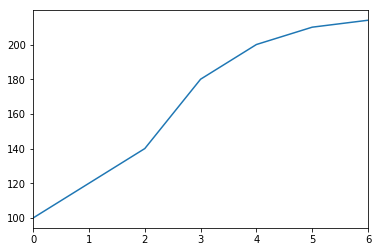

In [57]:
# line plot 
import pandas as pd
%matplotlib inline
data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot()

In [58]:
import pandas as pd

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}

city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


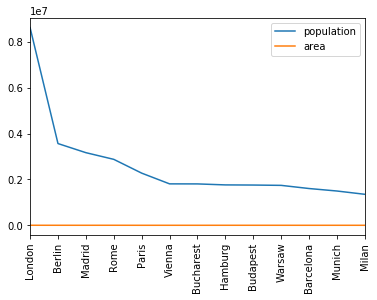

In [59]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True, 
                rot=90)

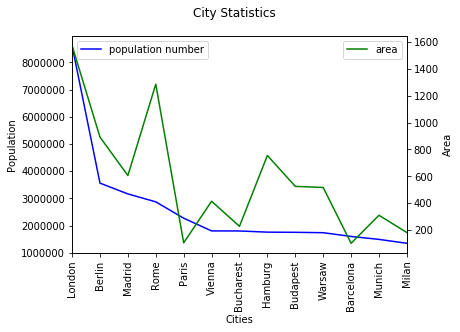

In [60]:
## twin axis

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Cities")

ax2 = ax.twinx()
ax2.set_ylabel("Area")

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax2, 
                        style="g-",
                        use_index=True, 
                        rot=90)

ax.legend(["population number"], loc=2)
ax2.legend(loc=1)

plt.show()

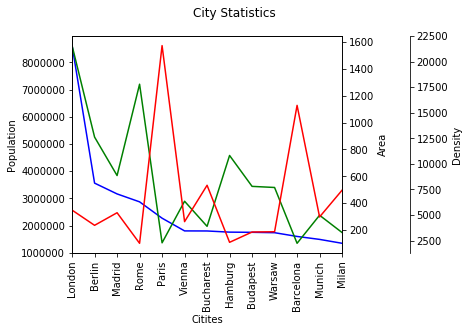

In [62]:
# Multiple Y axes

city_frame["density"] = city_frame["population"] / city_frame["area"]

city_frame

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Citites")

ax_area, ax_density = ax.twinx(), ax.twinx() 
ax_area.set_ylabel("Area")
ax_density.set_ylabel("Density")

rspine = ax_density.spines['right']
rspine.set_position(('axes', 1.25))
ax_density.set_frame_on(True)
ax_density.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax_area, 
                        style="g-",
                        use_index=True, 
                        rot=90)

city_frame["density"].plot(ax=ax_density, 
                           style="r-",
                           use_index=True, 
                           rot=90)

plt.show()

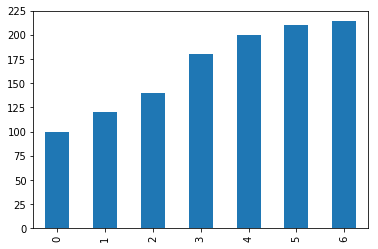

In [63]:
# bar plot 

import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot(kind="bar")

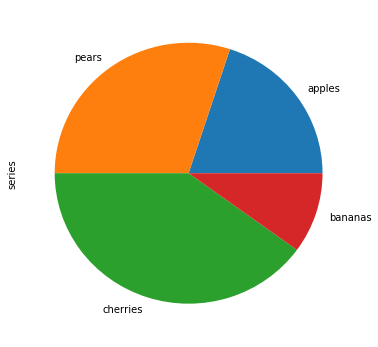

In [64]:
# pie 
import pandas as pd

fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')

series.plot.pie(figsize=(6, 6))

<a id="dta"></a>

### Datetime

In [65]:
from datetime import date

x = date(1993, 12, 14)
print(x)

1993-12-14


In [66]:
# We can instantiate dates in the range from January 1, 1 to December 31, 9999. This can be inquired from the attributes min and max:

from datetime import date

print(date.min)
print(date.max)

0001-01-01
9999-12-31


In [68]:
from datetime import date

x = date(1993, 12, 14)
print(x)

# We can access the day, month and year with attributes:

print(x.day)
print(x.month)
print(x.year)


1993-12-14
14
12
1993


In [69]:
from datetime import time

t = time(15, 6, 23)
print(t)

15:06:23


In [70]:
# Differences between Times
# Lets see what happens, if we subtract to datetime objects:

from datetime import datetime

delta = datetime(1993, 12, 14) - datetime(1991, 4, 30)
delta, type(delta)

(datetime.timedelta(days=959), datetime.timedelta)

In [71]:
from datetime import datetime, timedelta
d1 = datetime(1991, 4, 30)
d2 = d1 + timedelta(10,100)
print(d2)
print(d2 - d1)

1991-05-10 00:01:40
10 days, 0:01:40


In [72]:
s = str(d1)
s


'1991-04-30 00:00:00'

In [73]:
# Creating datetime Objects from Strings
# We can use strptime to create new datetime object by parsing a string containing a data and time. The arguments of strptime are the string to be parsed and a format specification.

from datetime import datetime
t = datetime.strptime("30 Nov 00", "%d %b %y")
print(t)

2000-11-30 00:00:00


In [74]:
# Time Series in Pandas and Python

# We could define a Pandas Series, which is built with an index consisting of time stamps.

import numpy as np
import pandas as pd

from datetime import datetime, timedelta as delta
ndays = 10
start = datetime(2017, 3, 31)
dates = [start - delta(days=x) for x in range(0, ndays)]

values = [25, 50, 15, 67, 70, 9, 28, 30, 32, 12]

ts = pd.Series(values, index=dates)
ts

2017-03-31    25
2017-03-30    50
2017-03-29    15
2017-03-28    67
2017-03-27    70
2017-03-26     9
2017-03-25    28
2017-03-24    30
2017-03-23    32
2017-03-22    12
dtype: int64

In [75]:
# Create Date Ranges
# The date_range method of the pandas module can be used to generate a DatetimeIndex:

import pandas as pd

index = pd.date_range('12/24/1970', '01/03/1971')
index

DatetimeIndex(['1970-12-24', '1970-12-25', '1970-12-26', '1970-12-27',
               '1970-12-28', '1970-12-29', '1970-12-30', '1970-12-31',
               '1971-01-01', '1971-01-02', '1971-01-03'],
              dtype='datetime64[ns]', freq='D')

In [76]:
# We have passed a start and an end date to date_range in our previous example. It is also possible to pass only a start or an end date to the function. In this case, we have to determine the number of periods to generate by setting the keyword parameter 'periods':

index = pd.date_range(start='12/24/1970', periods=4)
print(index)

DatetimeIndex(['1970-12-24', '1970-12-25', '1970-12-26', '1970-12-27'], dtype='datetime64[ns]', freq='D')


In [77]:
index = pd.date_range(end='12/24/1970', periods=3)
print(index)

DatetimeIndex(['1970-12-22', '1970-12-23', '1970-12-24'], dtype='datetime64[ns]', freq='D')


In [78]:
# We can also create time frequencies, which consists only of business days for example by setting the keyword parameter 'freq' to the string 'B':

index = pd.date_range('2017-04-07', '2017-04-13', freq="B")
print(index)

DatetimeIndex(['2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13'],
              dtype='datetime64[ns]', freq='B')


In [79]:
# In the following example, we create a time frequency which contains the month ends between two dates. We can see that the year 2016 contained the 29th of February, because it was a leap year:

index = pd.date_range('2016-02-25', '2016-07-02', freq="M")
index

DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30'],
              dtype='datetime64[ns]', freq='M')

In [80]:
index = pd.date_range('2017-02-05', '2017-04-13', freq="W-Mon")
index

DatetimeIndex(['2017-02-06', '2017-02-13', '2017-02-20', '2017-02-27',
               '2017-03-06', '2017-03-13', '2017-03-20', '2017-03-27',
               '2017-04-03', '2017-04-10'],
              dtype='datetime64[ns]', freq='W-MON')

In [81]:
# Example of linear combinations

import numpy as np
x = np.array([[0,1,1],[1,1,0],[1,0,1]])
y = ([3.65,1.55,3.42])
scalars = np.linalg.solve(x,y)